In [ ]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 16.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 108.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of selenium to determine which version is compatible with other requirements. Th

In [ ]:
import pycaret
pycaret.__version__

'3.3.2'

In [ ]:
!kaggle datasets download -d mayankpatel14/second-hand-used-cars-data-set-linear-regression
!unzip second-hand-used-cars-data-set-linear-regression.zip

Dataset URL: https://www.kaggle.com/datasets/mayankpatel14/second-hand-used-cars-data-set-linear-regression
License(s): unknown
second-hand-used-cars-data-set-linear-regression.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  second-hand-used-cars-data-set-linear-regression.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: train.csv               


In [ ]:
import pandas as pd
df = pd.read_csv('train.csv')

In [ ]:
print(df.columns)

Index(['v.id', 'on road old', 'on road now', 'years', 'km', 'rating',
       'condition', 'economy', 'top speed', 'hp', 'torque', 'current price'],
      dtype='object')


In [ ]:
from pycaret.regression import *
s = setup(df, target='current price', session_id=124)

,Description,Value
0,Session id,124
1,Target,current price
2,Target type,Regression
3,Original data shape,"(1000, 12)"
4,Transformed data shape,"(1000, 12)"
5,Transformed train set shape,"(700, 12)"
6,Transformed test set shape,"(300, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,5144.1392,53413415.6099,7226.0289,0.9967,0.0410,0.0232,2.0680
lasso,Lasso Regression,7346.2629,77971037.7617,8818.4657,0.9950,0.0409,0.0297,0.0220
lr,Linear Regression,7346.3194,77971899.1269,8818.5143,0.9950,0.0409,0.0297,0.4810
ridge,Ridge Regression,7346.0578,77971224.6086,8818.4632,0.9950,0.0408,0.0297,0.0250
en,Elastic Net,7276.4125,78612001.6132,8849.5995,0.9950,0.0405,0.0293,0.0220
llar,Lasso Least Angle Regression,7346.2629,77971037.8479,8818.4657,0.9950,0.0409,0.0297,0.0240
lar,Least Angle Regression,7383.6321,78090224.5542,8824.9147,0.9950,0.0410,0.0299,0.0250
gbr,Gradient Boosting Regressor,8759.0770,120927978.7090,10972.0418,0.9923,0.0525,0.0365,0.1970
lightgbm,Light Gradient Boosting Machine,8728.4064,131959806.0474,11412.1129,0.9916,0.0544,0.0365,0.1780
et,Extra Trees Regressor,11484.5554,226694845.8591,14896.7983,0.9854,0.0775,0.0505,0.2490


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [ ]:
best = create_model('catboost') #choose catboost to avoid plot errors with some models

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,6437.4944,77295103.9033,8791.7634,0.9959,0.0567,0.0320
1,5282.0013,65669543.0447,8103.6747,0.9956,0.0678,0.0289
2,5975.6052,84029104.7784,9166.7390,0.9952,0.0462,0.0275
3,4332.0319,38333484.6828,6191.4041,0.9973,0.0279,0.0178
4,4539.8012,37960121.0070,6161.1785,0.9971,0.0252,0.0179
5,5473.5726,51410150.8377,7170.0872,0.9967,0.0396,0.0221
6,5295.6656,46438063.1722,6814.5479,0.9976,0.0447,0.0255
7,4259.5827,31644341.6934,5625.3304,0.9979,0.0320,0.0196
8,4869.9616,52379470.5209,7237.3663,0.9963,0.0330,0.0200


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

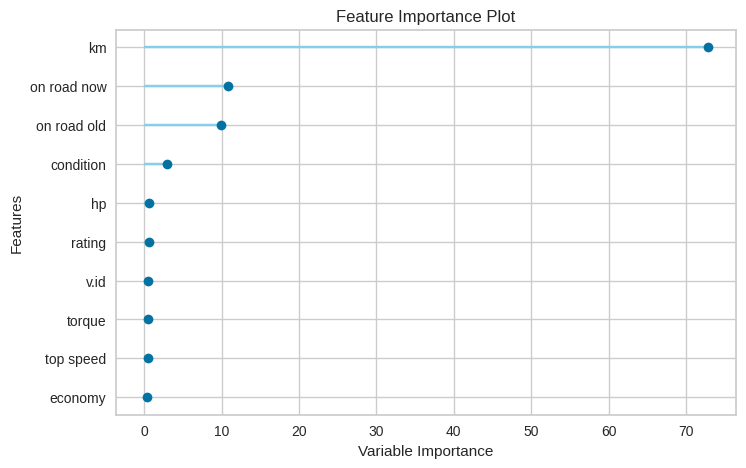

In [ ]:
# plot feature importance
plot_model(best, plot = 'feature')

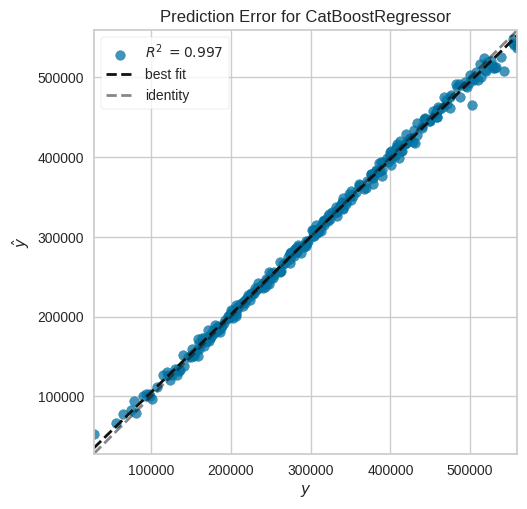

In [ ]:
# plot residuals
plot_model(best, plot = 'error')

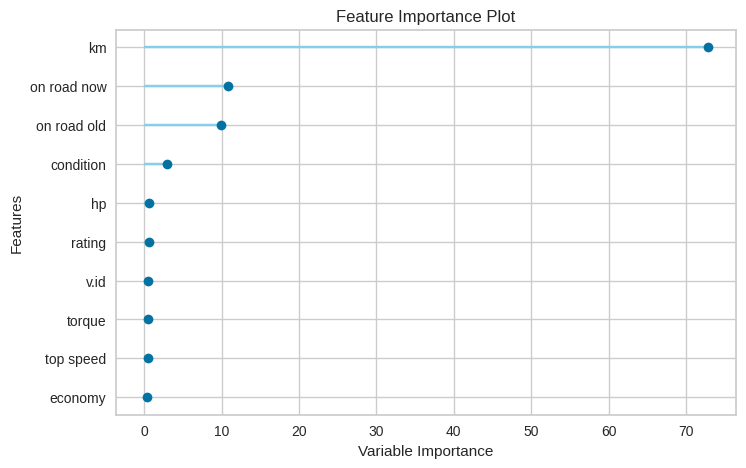

In [ ]:
# plot feature importance
plot_model(best, plot = 'feature')

In [ ]:
# predict on test set
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,4857.9427,45632721.3439,6755.1996,0.9970,0.0467,0.0216


In [ ]:
# show predictions df
holdout_pred.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price,prediction_label
80,81,595886,752626,2,62563,2,4,12,158,110,118,424781.0,423521.267188
789,790,625048,731255,5,129866,1,7,11,171,54,79,165741.5,173208.512621
869,870,501908,771448,5,135572,3,2,8,164,99,124,93190.5,103381.589167
518,519,572777,736355,2,83022,4,6,8,179,109,75,327075.5,330892.361461
794,795,601674,802226,2,62186,3,3,9,191,95,112,453672.5,457670.972525


In [ ]:
# copy data and drop charges

new_data = df.copy()
new_data.drop('current price', axis=1, inplace=True)
new_data.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque
0,1,535651,798186,3,78945,1,2,14,177,73,123
1,2,591911,861056,6,117220,5,9,9,148,74,95
2,3,686990,770762,2,132538,2,8,15,181,53,97
3,4,573999,722381,4,101065,4,3,11,197,54,116
4,5,691388,811335,6,61559,3,9,12,160,53,105


In [ ]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,prediction_label
0,1,535651,798186,3,78945,1,2,14,177,73,123,350214.165614
1,2,591911,861056,6,117220,5,9,9,148,74,95,285075.119112
2,3,686990,770762,2,132538,2,8,15,181,53,97,215818.681597
3,4,573999,722381,4,101065,4,3,11,197,54,116,245028.855212
4,5,691388,811335,6,61559,3,9,12,160,53,105,530746.254460


In [ ]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['v.id', 'on road old',
                                              'on road now', 'years', 'km',
                                              'rating', 'condition', 'economy',
                                              'top speed', 'hp', 'torque'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('cate...
                                     transformer

In [ ]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['v.id', 'on road old',
                                             'on road now', 'years', 'km',
                                             'rating', 'condition', 'economy',
                                             'top speed', 'hp', 'torque'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean...
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent'))),
                ('clean_column_names',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('trained_model',
                 <catboost.core.CatBoostRegressor object at 0x782894b22a70>)],
         verbose=False)